In [1]:
import pandas as pd
import numpy as np
import os

csv_files = [
    'NH_CitationDescriptions_Oct2024.csv', 'NH_CovidVaxAverages_20241027.csv',
    'NH_CovidVaxProvider_20241027.csv', 'NH_DataCollectionIntervals_Oct2024.csv',
    'NH_HlthInspecCutpointsState_Oct2024.csv', 'NH_Ownership_Oct2024.csv',
    'NH_Penalties_Oct2024.csv', 'NH_ProviderInfo_Oct2024.csv',
    'NH_QualityMsr_Claims_Oct2024.csv', 'NH_QualityMsr_MDS_Oct2024.csv',
    'NH_StateUSAverages_Oct2024.csv', 'NH_SurveyDates_Oct2024.csv',
    'NH_SurveySummary_Oct2024.csv', 'PBJ_Daily_Nurse_Staffing_Q2_2024.csv',
    'Skilled_Nursing_Facility_Quality_Reporting_Program_National_Data_Oct2024.csv',
    'Skilled_Nursing_Facility_Quality_Reporting_Program_Provider_Data_Oct2024.csv',
     'Swing_Bed_SNF_data_Oct2024.csv'
]

results = []

for file in csv_files:
    file_path = os.path.join(os.getcwd(), file)

    if not os.path.isfile(file_path):
        print(f"⚠️ File not found: {file}")
        continue

    try:
        df = pd.read_csv(file_path, encoding='latin-1')
    except Exception as e:
        print(f"❌ Failed to read {file}: {e}")
        continue

    # ✅ Missing values
    missing_count = int(df.isna().sum().sum())

    # ✅ Duplicate rows
    duplicate_count = int(df.duplicated().sum())

    # ✅ Outliers (3-sigma rule on numeric columns only)
    outlier_count = 0
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        col_mean = df[col].mean()
        col_std = df[col].std()

        if pd.notnull(col_std) and col_std > 0:
            outliers = df[(df[col] < col_mean - 3 * col_std) |
                          (df[col] > col_mean + 3 * col_std)]
            outlier_count += outliers.shape[0]

    results.append({
        "csv_file_name": file,
        "missing_values": missing_count,
        "duplicate_rows": duplicate_count,
        "outliers_3std": outlier_count
    })

# ✅ Create summary DataFrame
summary_df = pd.DataFrame(results)

summary_df


C:\Users\farad\AppData\Local\Temp\ipykernel_14956\300628652.py:29: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1')
C:\Users\farad\AppData\Local\Temp\ipykernel_14956\300628652.py:29: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1')
C:\Users\farad\AppData\Local\Temp\ipykernel_14956\300628652.py:29: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1')


,csv_file_name,missing_values,duplicate_rows,outliers_3std
0,jupyter_uploader_accessKeys (1).csv,0,0,0
1,jupyter_uploader_accessKeys.csv,0,0,0
2,NH_CitationDescriptions_Oct2024.csv,0,0,12
3,NH_CovidVaxAverages_20241027.csv,0,0,3
4,NH_CovidVaxProvider_20241027.csv,0,0,0
5,NH_DataCollectionIntervals_Oct2024.csv,45,0,0
6,NH_HlthInspecCutpointsState_Oct2024.csv,0,0,0
7,NH_Ownership_Oct2024.csv,2172,0,0
8,NH_Penalties_Oct2024.csv,53843,0,676
9,NH_ProviderInfo_Oct2024.csv,232355,0,12592


In [6]:
import pandas as pd
df = pd.read_csv('PBJ_Daily_Nurse_Staffing_Q2_2024.csv', encoding='latin-1')


C:\Users\farad\AppData\Local\Temp\ipykernel_14956\845597323.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PBJ_Daily_Nurse_Staffing_Q2_2024.csv', encoding='latin-1')


In [10]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Load datasets
# staffing = pd.read_csv("PBJ_Daily_Nurse_Staffing_Q2_2024.csv", encoding='latin-1')
# providers = pd.read_csv("NH_ProviderInfo_Oct2024.csv", encoding='latin-1')

C:\Users\farad\AppData\Local\Temp\ipykernel_14956\2675085026.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  staffing = pd.read_csv("PBJ_Daily_Nurse_Staffing_Q2_2024.csv", encoding='latin-1')


## Defined Metrics

Metric 1: Nurse Hours per Resident (Staffing Intensity)
(Hrs_RN + Hrs_LPN + Hrs_CNA + Hrs_MedAide) / MDScensus

Metric 2: Total Nurse Hours Worked
SUM(Hrs_RN + Hrs_LPN + Hrs_CNA + Hrs_MedAide)

Metric 3: Contract Staffing Ratio (Temporary Staff Dependence)
(Hrs_RN_ctr + Hrs_LPN_ctr + Hrs_CNA_ctr) 
/ 
(Hrs_RN + Hrs_LPN + Hrs_CNA)

Metric 4: Resident Census Trend (Occupancy Proxy)
AVG(MDScensus)

# Initial Charts

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [80]:
staffing = pd.read_csv("PBJ_Daily_Nurse_Staffing_Q2_2024.csv", low_memory=False, encoding="latin-1")
providers = pd.read_csv("NH_ProviderInfo_Oct2024.csv", low_memory=False, encoding="latin-1")


In [81]:
staffing["PROVNUM"] = staffing["PROVNUM"].astype(str)
providers["CMS Certification Number (CCN)"] = providers["CMS Certification Number (CCN)"].astype(str)


In [82]:
df = staffing.merge(
    providers,
    left_on="PROVNUM",
    right_on="CMS Certification Number (CCN)",
    how="left"
)


In [83]:
df["census"] = df["MDScensus"]

df["total_nurse_hours"] = (
    df["Hrs_RN"] +
    df["Hrs_LPN"] +
    df["Hrs_CNA"] +
    df["Hrs_NAtrn"] +
    df["Hrs_MedAide"]
)

df["hours_per_resident"] = df["total_nurse_hours"] / df["census"].replace(0, np.nan)


In [84]:
prov_state_col = "STATE"
prov_type_col = "Provider Type"
prov_name_col = "Provider Name"


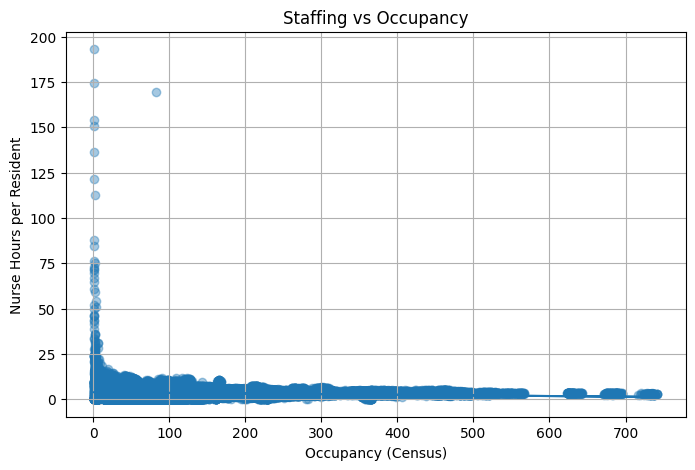

In [85]:
#Question 1
grp = (
    df.groupby(["PROVNUM", "WorkDate"], as_index=False)
      .agg(
          census=("census", "mean"),
          hours_per_resident=("hours_per_resident", "mean")
      )
      .dropna()
)

plt.figure(figsize=(8,5))
plt.scatter(grp["census"], grp["hours_per_resident"], alpha=0.4)

m, b = np.polyfit(grp["census"], grp["hours_per_resident"], 1)
plt.plot(grp["census"], m * grp["census"] + b)

plt.xlabel("Occupancy (Census)")
plt.ylabel("Nurse Hours per Resident")
plt.title("Staffing vs Occupancy")
plt.grid(True)
plt.show()



QUESTION 1: Relationship staffing vs occupancy
Pearson correlation (hours_per_resident vs census): r=-0.185, p=0


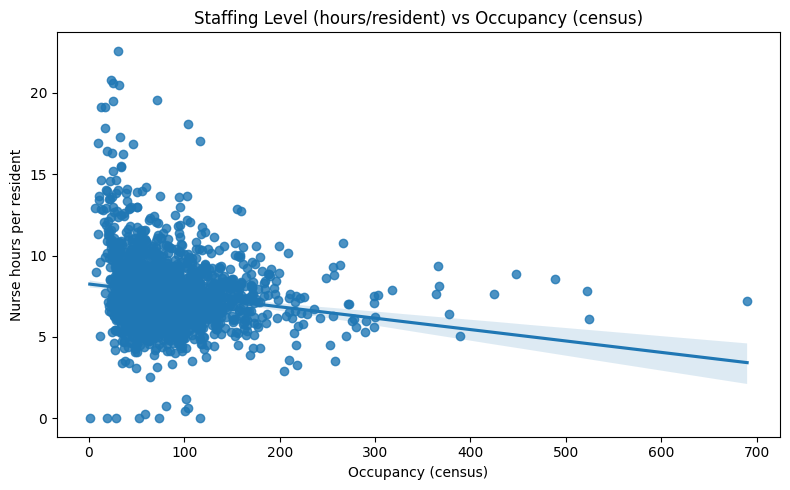

In [86]:
print("\nQUESTION 1: Relationship staffing vs occupancy")

# Prepare aggregation: daily/provider
agg_cols = [prov_id_col] if prov_id_col else []
if date_col:
    agg_cols.append(date_col)

grouped = merged.groupby(agg_cols).agg(
    total_nurse_hours = ("total_nurse_hours", "sum"),
    census = ("census", "mean"),
    hours_per_resident = ("hours_per_resident", "mean")
).reset_index()

# Drop rows with missing census or hours_per_resident
grp = grouped.dropna(subset=["census", "hours_per_resident"])

if not grp.empty:
    r, p = pearsonr(grp["hours_per_resident"], grp["census"])
    print(f"Pearson correlation (hours_per_resident vs census): r={r:.3f}, p={p:.3g}")
    # scatter plot with regression line
    plt.figure(figsize=(8,5))
    sns.regplot(x="census", y="hours_per_resident", data=grp.sample(min(len(grp),2000), random_state=1))
    plt.xlabel("Occupancy (census)")
    plt.ylabel("Nurse hours per resident")
    plt.title("Staffing Level (hours/resident) vs Occupancy (census)")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data to compute relationship (missing census or hours_per_resident).")

In [87]:
#Question 2

df["contract_hours"] = (
    df["Hrs_RN_ctr"] +
    df["Hrs_LPN_ctr"] +
    df["Hrs_CNA_ctr"] +
    df["Hrs_NAtrn_ctr"] +
    df["Hrs_MedAide_ctr"]
)

ot_by_provider = (
    df.groupby(["PROVNUM", prov_name_col], as_index=False)
      .agg(total_contract_hours=("contract_hours", "sum"))
      .sort_values("total_contract_hours", ascending=False)
)

display(ot_by_provider.head(10))

,PROVNUM,Provider Name,total_contract_hours
8131,335100,ISABELLA GERIATRIC CENTER INC,73472.52
10589,395290,PLEASANT ACRES REHABILITATION AND NURSING CENTER,73236.24
8609,335791,QUEENS BOULEVARD EXTENDED CARE FACILITY,65864.25
10481,395015,BRIGHTON REHABILITATION AND WELLNESS CENTER,61079.82
8196,335227,WORKMENS CIRCLE MULTICARE CENTER,59676.21
8365,335462,THE PLAZA REHAB AND NURSING CENTER,59623.58
6289,235729,MICHIGAN VETERAN HOMES AT GRAND RAPIDS,56973.91
8595,335772,RICHMOND CTR FOR REHAB AND SPECIALTY HEALTHCARE,54301.75
8180,335201,BETH ABRAHAM CENTER FOR REHABILITATION AND NUR...,53483.72
2205,105910,CORAL REEF SUBACUTE CARE CENTER LLC,53008.67


In [88]:
#Question 3

agg = (
    df.groupby([prov_state_col, prov_type_col])
      .agg(
          avg_hours_per_resident=("hours_per_resident", "mean"),
          avg_total_hours=("total_nurse_hours", "mean"),
          observations=("total_nurse_hours", "count")
      )
      .reset_index()
)

# ✅ FIXED sort_values
display(
    agg
    .sort_values([prov_state_col, "avg_hours_per_resident"])
    .head(20)
)


,STATE,Provider Type,avg_hours_per_resident,avg_total_hours,observations
0,AK,Medicare and Medicaid,6.162333,253.014639,1274
1,AL,Medicaid,3.534087,155.577088,182
3,AL,Medicare and Medicaid,3.590820,350.246499,19565
2,AL,Medicare,3.727720,152.741538,455
6,AR,Medicare and Medicaid,3.719004,274.436632,19383
5,AR,Medicare,5.014849,224.628571,91
4,AR,Medicaid,5.083875,630.587308,182
8,AZ,Medicare and Medicaid,3.647666,329.311179,10101
7,AZ,Medicare,4.340207,213.357425,2548
9,CA,Medicaid,3.649873,265.277987,2275


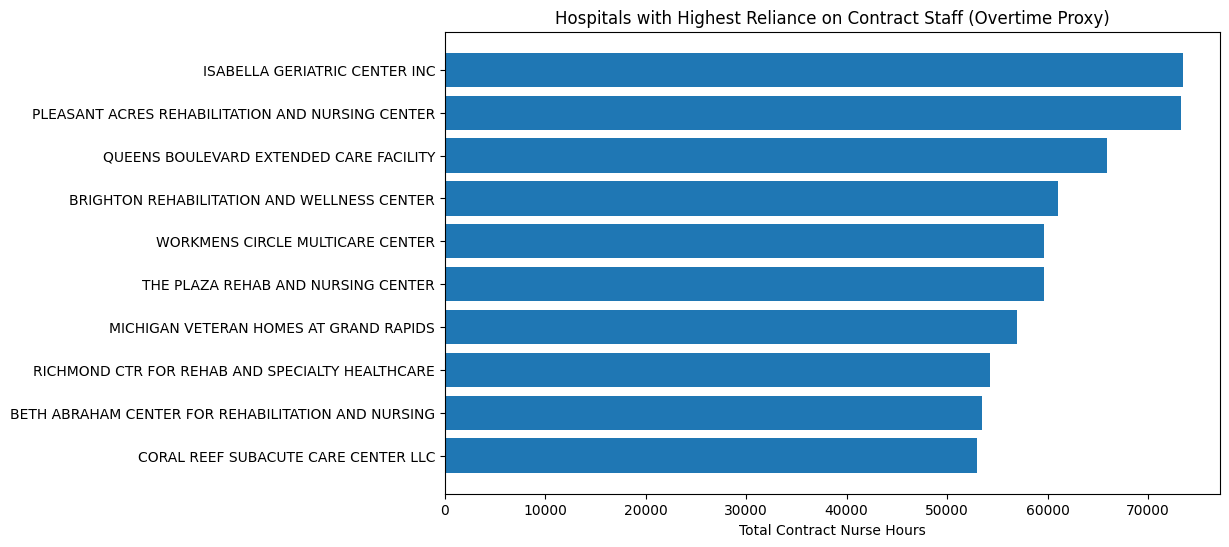

In [89]:
top10 = ot_by_provider.head(10)

plt.figure(figsize=(10,6))
plt.barh(top10[prov_name_col], top10["total_contract_hours"])
plt.xlabel("Total Contract Nurse Hours")
plt.title("Hospitals with Highest Reliance on Contract Staff (Overtime Proxy)")
plt.gca().invert_yaxis()
plt.show()

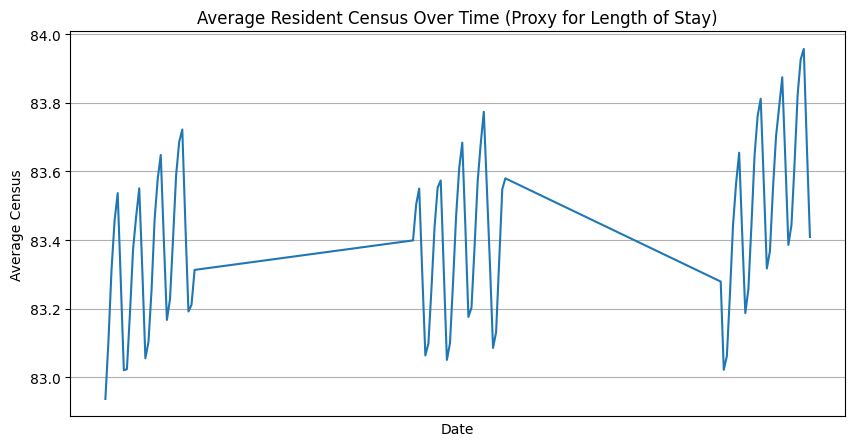

In [90]:
# Question 4

# ensure WorkDate is datetime
df["WorkDate"] = pd.to_datetime(df["WorkDate"])

# daily average census across all providers
census_trend = (
    df.groupby("WorkDate", as_index=False)
      .agg(avg_census=("MDScensus", "mean"))
)

plt.figure(figsize=(10,5))
plt.plot(census_trend["WorkDate"], census_trend["avg_census"])
plt.title("Average Resident Census Over Time (Proxy for Length of Stay)")
plt.xlabel("Date")
plt.ylabel("Average Census")
plt.grid(True)
plt.show()


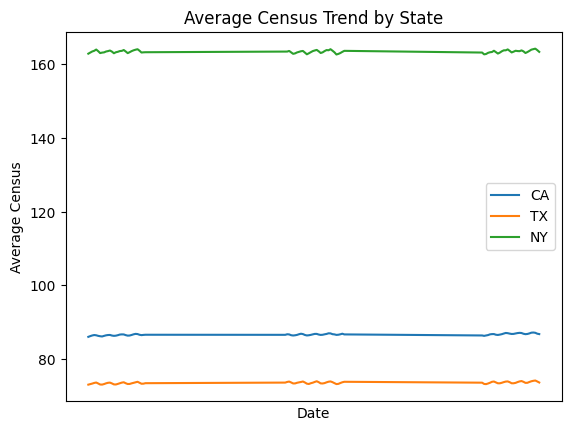

In [91]:
state_census = (
    df.groupby(["State", "WorkDate"], as_index=False)
      .agg(avg_census=("MDScensus", "mean"))
)

for state in ["CA", "TX", "NY"]:
    subset = state_census[state_census["State"] == state]
    plt.plot(subset["WorkDate"], subset["avg_census"], label=state)

plt.legend()
plt.title("Average Census Trend by State")
plt.xlabel("Date")
plt.ylabel("Average Census")
plt.show()


## Steps to run streamlit app

In [75]:
#!pip install streamlit matplotlib pandas

In [66]:
#!jupyter nbconvert --to script dashboard.ipynb

[NbConvertApp] Converting notebook dashboard.ipynb to script
[NbConvertApp] Writing 3651 bytes to dashboard.py


In [76]:
#pip install streamlit-jupyter

run this in terminal:
1. cd Downloads
2. streamlit run dashboard.py